# EDA - Understanding The Economic Context
##### This workbook focuses on Government Benefits & Taxation in the US from 2001-2023 and followed by their relationship with credit growth and credit delinquencies. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../code/')
from time_series_plots import plot_time_series
sns.set_style("darkgrid")
np.random.seed(42)

In [38]:
df.corr(numeric_only=True)['cc_bals_30d_due_percentage'].sort_values(ascending=False).head(20)

cc_bals_30d_due_percentage           1.000000
cc_bals_30d_due_percentage.1         1.000000
cc_bals_90d_due_percentage.1         0.963949
cc_bals_90d_due_percentage           0.963949
cc_bals_30d_due_percentage_6m        0.661792
cc_bals_90d_due_percentage_yoy       0.541656
fedfunds                             0.489929
cc_bals_30d_due_percentage_yoy       0.486059
HE Revolving                         0.367003
personal_interest_payments           0.340977
mortgage_rate_30_yr                  0.326304
cc_payments_yoy                      0.263380
cc_balance_total_billions            0.228033
cc_bals_30d_due_percentage_yoy_3m    0.205310
Mortgage_servicing                   0.168038
cc_payments                          0.153890
shelter_yoy                          0.140519
medical_care_yoy                     0.135529
Credit Card                          0.126310
personal_interest_income             0.037482
Name: cc_bals_30d_due_percentage, dtype: float64

In [2]:
df = pd.read_csv('../data/master_acd_gdp_ffr.csv', index_col='date', parse_dates=True)
df.drop(columns=['year', 'month'], inplace=True)
df.head()


,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,gasoline_yoy,imports_yoy,...,cc_payments_yoy,Mortgage_servicing_yoy,cc_bals_30d_due_percentage_yoy,cc_bals_90d_due_percentage_yoy,cc_bals_30d_due_percentage_yoy_3m,cc_bals_30d_due_percentage_yoy_6m,cc_bals_30d_due_percentage_6m,gdp,gdp_yoy,fedfunds
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,283960000.0,4.2,NaN,3.732227,3.252886,17.777778,4.538341,2.889825,13.143736,2.760736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10470.231000,4.679500,5.98
2001-02-01,284166000.0,4.2,NaN,3.533569,3.457307,13.110540,4.600390,3.006615,8.400292,0.200602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10513.154000,4.255523,5.49
2001-03-01,284380000.0,4.3,NaN,2.920561,3.496868,5.973813,4.540163,3.123123,-6.099935,-1.601602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10556.077000,3.838372,5.31
2001-04-01,284602000.0,4.4,NaN,3.269119,3.595623,10.273405,4.643963,3.181273,3.851262,-0.710660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10599.000000,3.427884,4.80
2001-05-01,284834000.0,4.3,NaN,3.615160,3.742204,15.785124,4.668210,3.108189,15.420561,-0.809717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10598.673333,3.188251,4.21


In [35]:
df.columns

Index(['population', 'unemployment_rate', 'hourly_earnings_yoy', 'cpi_yoy',
       'shelter_yoy', 'energy_yoy', 'medical_care_yoy', 'food_yoy',
       'gasoline_yoy', 'imports_yoy', 'new_&_used_vehicles_yoy',
       'all_less_food_&_shelter_yoy', 'total_personal_income',
       'total_employee_compensation', 'wages_and_salaries_all',
       'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_saving_as_a_percentage_of_disposable_personal_income',
       'disp_inc_per_ca

In [3]:
# make subset of particular variables to focus on
df_subset = df[['cpi_yoy', 
                'gdp_yoy', 
                'fedfunds', 
                'credit_yoy', 
                'tax_total_all_taxes', 
                'total_gov_social_benefits', 
                'social_security', 
                'medicare', 
                'medicaid', 
                'unemployment_insurance', 
                "veterans'_benefits",
                'cc_bals_90d_due_percentage',
                'disp_inc_per_capita_chained_2017', 
                'cc_balance_total_billions',
                'total_disposable_personal_income', 
                 
                  ]]

In [4]:
df_tax_benefits =  df[[
                'tax_total_all_taxes', 
                'total_gov_social_benefits', 
                'social_security', 
                'medicare', 
                'medicaid', 
                'unemployment_insurance',
                "veterans'_benefits"
                 ]]

In [5]:
# make a year-on-year growth df
df_tax_benefits_yoy_growth = df_tax_benefits.pct_change(periods=12) * 100  # Assuming monthly data

# rename columns to YoY growth
df_tax_benefits_yoy_growth.columns = [f"{col} YoY growth (%)" for col in df_tax_benefits_yoy_growth.columns]

In [6]:
# change nominal df to be in billion to make more interpretable 
df_tax_benefits = df_tax_benefits/ 1e9

# rename columns to YoY growth
df_tax_benefits.columns = [f"{col}_(billions)" for col in df_tax_benefits.columns]

df_tax_benefits.describe()

,tax_total_all_taxes_(billions),total_gov_social_benefits_(billions),social_security_(billions),medicare_(billions),medicaid_(billions),unemployment_insurance_(billions),veterans'_benefits_(billions)
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,2950.427873,2458.130207,781.811793,567.191967,468.909888,83.804917,81.930417
std,898.474138,1008.843198,257.322155,210.252066,181.846602,159.716950,46.720868
min,1743.536000,1100.584000,419.208000,231.492000,210.816000,19.277000,25.980000
25%,2226.716250,1610.008000,545.969000,406.158250,310.648000,30.568500,39.373250
50%,2605.035500,2325.272500,760.847000,554.208000,419.894000,33.865500,70.044000
75%,3527.757500,2904.629750,964.659000,718.792250,586.260250,67.964250,117.691750
max,5001.717000,8124.572000,1379.646000,953.125000,916.208000,1434.899000,173.931000


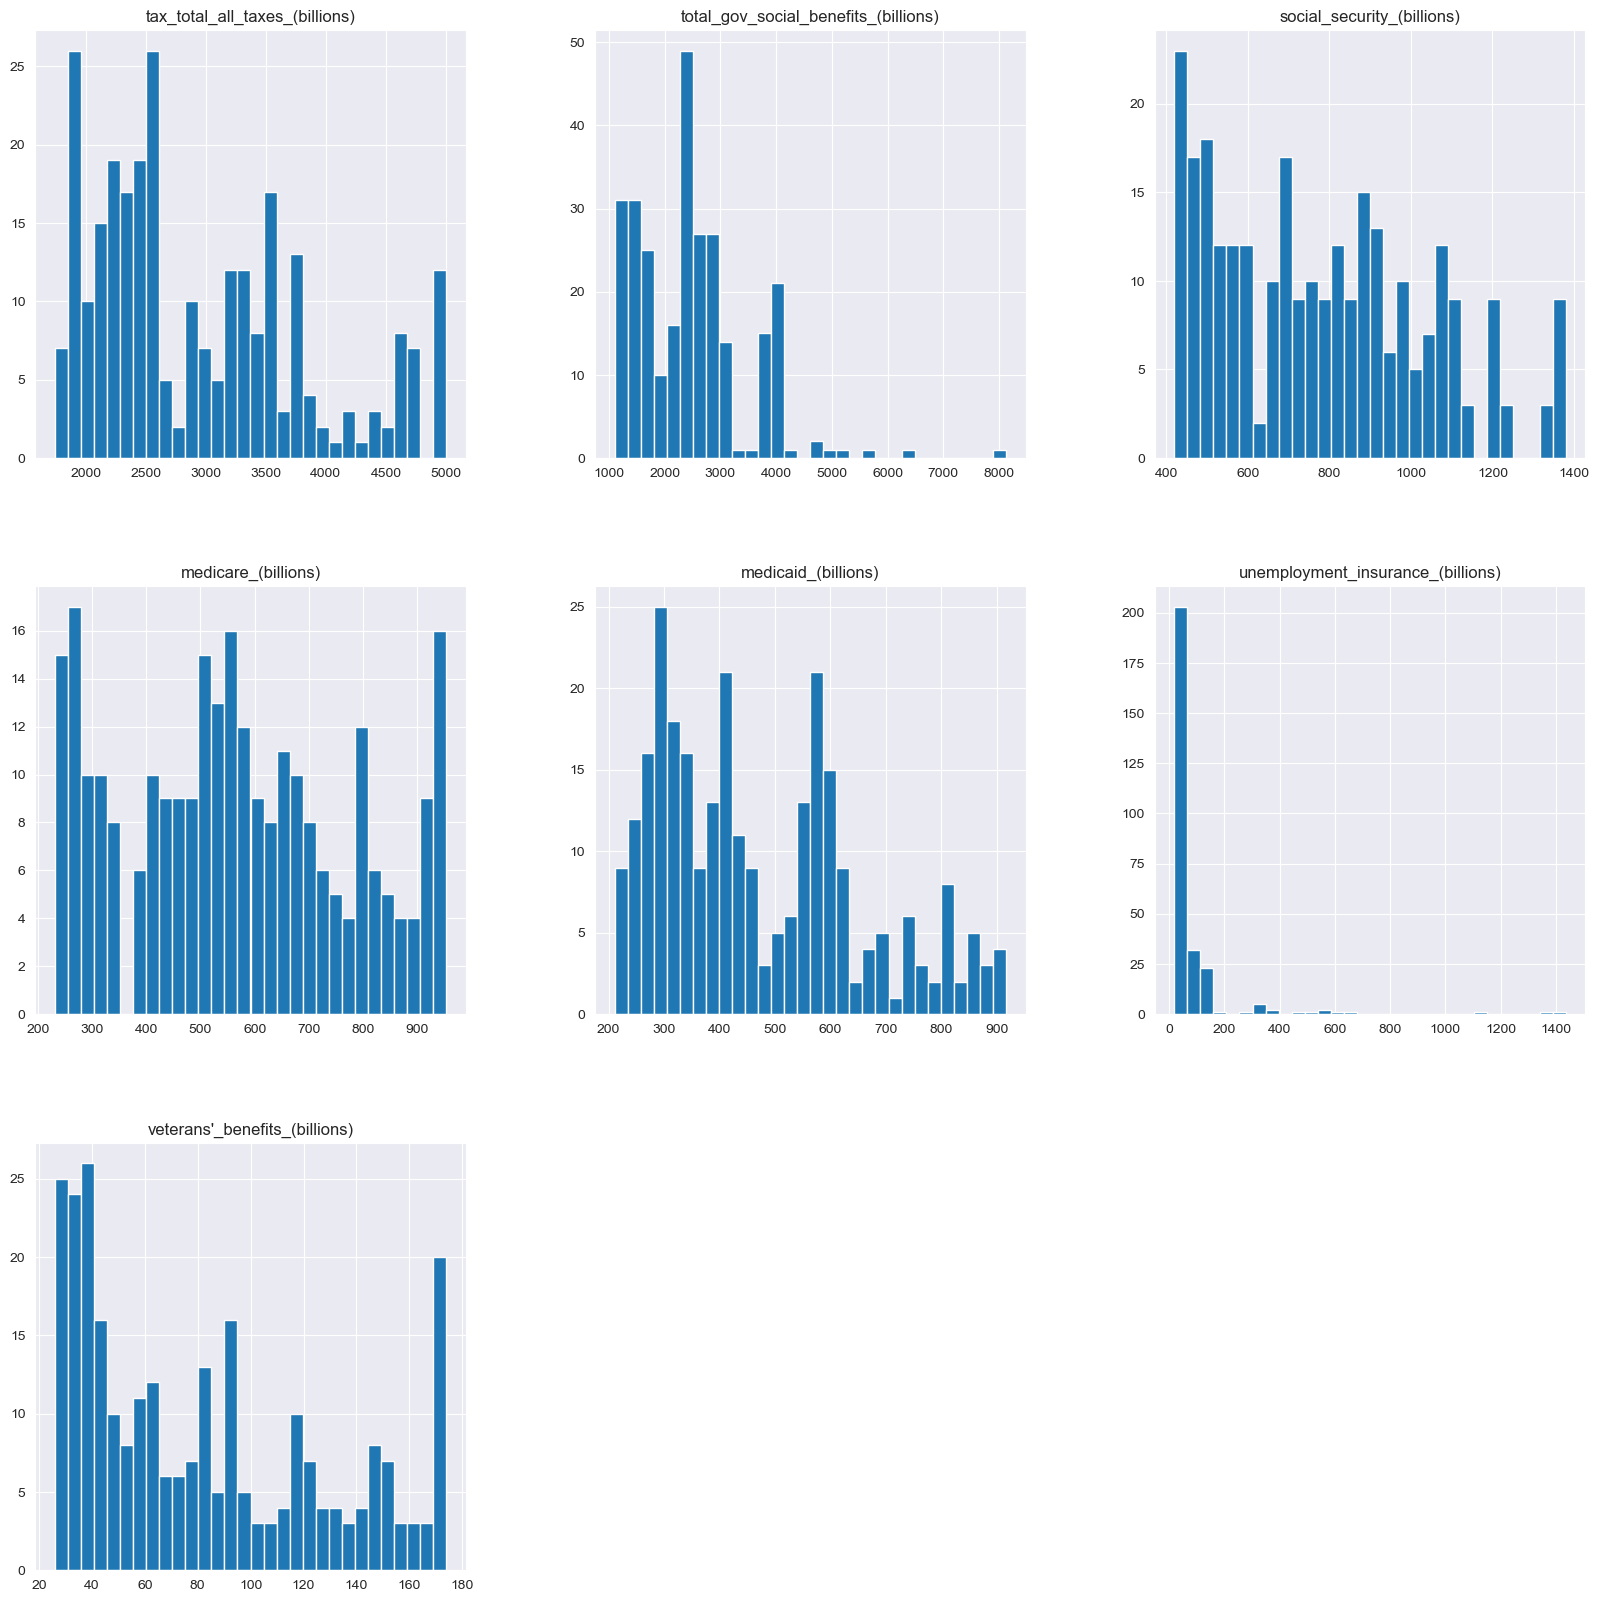

In [7]:
df_tax_benefits.hist(bins = 30, figsize = (20, 20));

In [8]:
# Highest month uninsurance benefits
df_tax_benefits[df_tax_benefits['unemployment_insurance_(billions)']>1000]

,tax_total_all_taxes_(billions),total_gov_social_benefits_(billions),social_security_(billions),medicare_(billions),medicaid_(billions),unemployment_insurance_(billions),veterans'_benefits_(billions)
date,,,,,,,
2020-05-01,3619.760,5173.249,1076.108,815.690,655.421,1116.350,144.808
2020-06-01,3710.976,4828.375,1074.371,817.664,672.750,1368.084,145.574
2020-07-01,3767.529,4922.350,1078.039,820.089,687.723,1434.899,146.437


- Total taxes, flat distirbution. Large spread from $1.74-5 trillion per month, as seen below this is due to steady growth in total taxes over last 20 years. With two notable falls in 2009, after the credit crunch and as a result of covid in 2020.
- Total government benefits have notable outliers with months where benefits reached $8.1 trillion. This is likely due to the high outliers in Unemplotment Insurance which can be seen, these are the abnormal payments authorised during covid lockdowns as will be confirmed futher down. 
- Social security - retirement income for American workers - makes up the bulk of government social benefits with a median of $5.5 trillion per month. Which is 22% of tax revenue and 1/3 of all government social benefit spending. 
- Unemployment insurance median of $34 billion per month compared to the covid highs of $1.434 trillion in July 2020, $1.368 trillion in June 2020 and $1.116 trillion in May 2020. 
- Veterans benefits skewed left, mean of $69 billion monthly, min $26, max of $173 billion. 

## Taxation

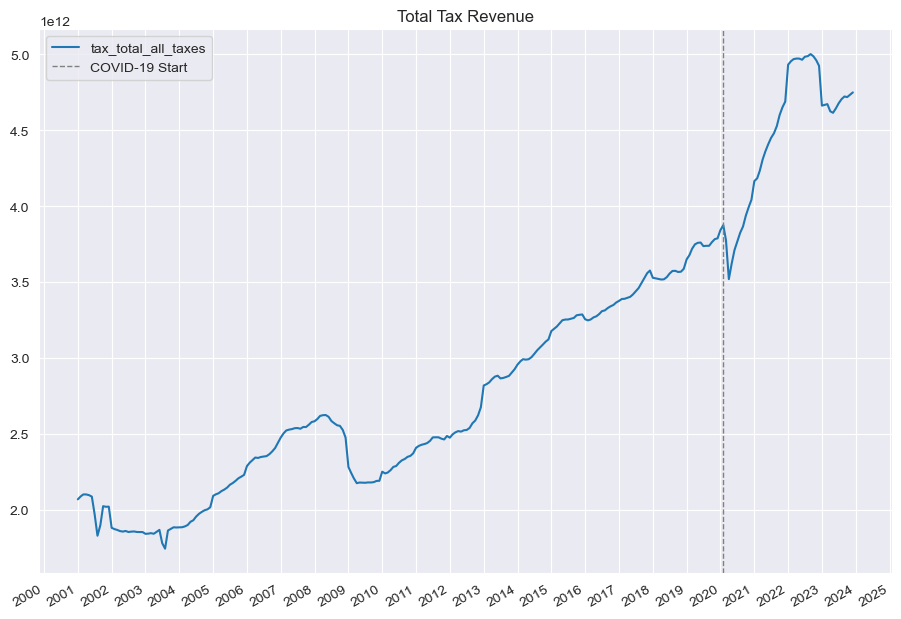

/Users/AaranDaniel/Desktop/DSI/projects/Group_Project_5_GA/Working_AD/../code/time_series_plots.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


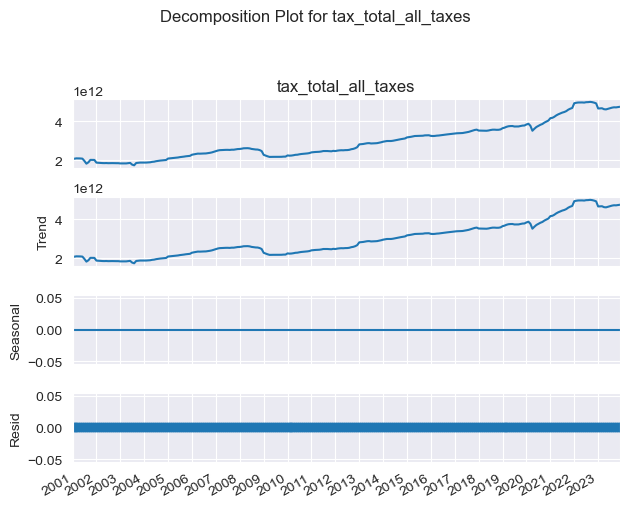

In [9]:
plot_time_series(df_subset, title = 'Total Tax Revenue', columns = ['tax_total_all_taxes'], acc = True, covid_start=True);

- No seasonality seen in tax revenue. 

In [10]:
df_subset.corr(numeric_only=True)['tax_total_all_taxes'].sort_values(ascending=False)

tax_total_all_taxes                 1.000000
veterans'_benefits                  0.977859
medicaid                            0.975873
total_disposable_personal_income    0.968755
social_security                     0.964236
medicare                            0.961207
disp_inc_per_capita_chained_2017    0.924662
total_gov_social_benefits           0.875890
cc_balance_total_billions           0.772373
cpi_yoy                             0.427259
gdp_yoy                             0.342684
unemployment_insurance              0.147796
credit_yoy                          0.073092
fedfunds                           -0.014029
cc_bals_90d_due_percentage         -0.400547
Name: tax_total_all_taxes, dtype: float64

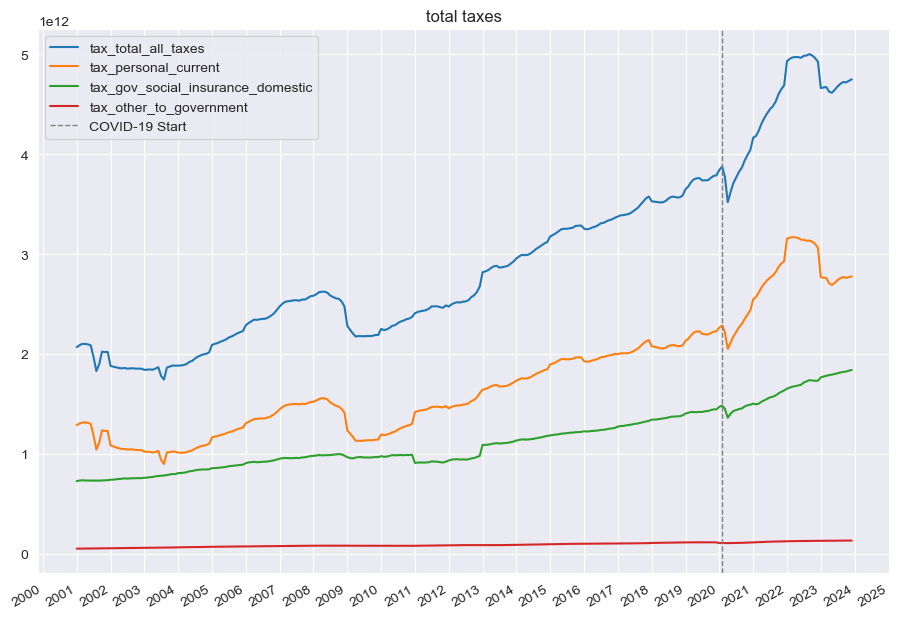

In [11]:
plot_time_series(df, columns = ['tax_total_all_taxes', 
                                       'tax_personal_current',
                                        'tax_gov_social_insurance_domestic',
                                        'tax_other_to_government'],title = 'total taxes', covid_start=True)

- Bulk of the rise in tax revenue since covid is due to the rise in personal current taxes which primarily consists of personal income tax of individuals and capital gains taxation. 
- According to the White House and Treasury press release "After atypically strong growth in revenues in 2022, driven by record-high capital gains receipts and the historic recovery from the pandemic, revenues in 2023 fell ...with individual and corporate receipts returning to lower levels." [Joint Statement of Janet L. Yellen, Secretary of the Treasury, and Shalanda D. Young, Director of the Office of Management and Budget on Budget Results for Fiscal Year 2023](https://www.whitehouse.gov/omb/briefing-room/2023/10/20/joint-statement-of-janet-l-yellen-secretary-of-the-treasury-and-shalanda-d-young-director-of-the-office-of-management-and-budget-on-budget-results-for-fiscal-year-2023/#:~:text=After%20atypically%20strong%20growth%20in,with%20projections%20made%20after%20the)



In [12]:
df.corr(numeric_only=True)['tax_total_all_taxes'].sort_values(ascending=False).tail(10)

fedfunds                        -0.014029
cc_bals_30d_due_percentage_6m   -0.249464
cc_bals_30d_due_percentage.1    -0.364895
cc_bals_30d_due_percentage      -0.364895
mortgage_rate_30_yr             -0.386658
cc_bals_90d_due_percentage.1    -0.400547
cc_bals_90d_due_percentage      -0.400547
unemployment_rate               -0.401422
medical_care_yoy                -0.545184
HE Revolving                    -0.588373
Name: tax_total_all_taxes, dtype: float64

- Total tax revenue per month negatively correlated with Home Equity revolving debt (debt where home serves as collateral). 
- Taxes negatively correlated with credit card delinquency, as tax revenues increase credit card delinquency falls. This may be because when economic conditions are strong and consumers are doing well tax revenue increases. A similar explanation for unemployment rate being negatively correlated with tax revenues. 
- Supported by evidence bellow showing high correlation between tax revenues and wages, dividend income, gdp, all signs of a healthy expanding economy. Pro-cyclical forces. 

In [13]:
df.corr(numeric_only=True)['tax_total_all_taxes'].sort_values(ascending=False).head(10)

tax_total_all_taxes                                       1.000000
tax_personal_current                                      0.995811
wages_salaries_private_employees                          0.990048
wages_and_salaries_all                                    0.987927
total_employee_compensation                               0.986343
tax_gov_social_insurance_domestic                         0.986020
personal_dividend_income                                  0.985122
gdp                                                       0.982565
employer_contributions_for_government_social_insurance    0.982208
total_all_personal_outlays                                0.979673
Name: tax_total_all_taxes, dtype: float64

In [14]:
df_tax_benefits_yoy_growth.dropna(inplace=True)
df_subset_2 = df_subset.merge(df_tax_benefits_yoy_growth, left_index = True, right_index=True, how = 'left')
df_subset_2

,cpi_yoy,gdp_yoy,fedfunds,credit_yoy,tax_total_all_taxes,total_gov_social_benefits,social_security,medicare,medicaid,unemployment_insurance,...,disp_inc_per_capita_chained_2017,cc_balance_total_billions,total_disposable_personal_income,tax_total_all_taxes YoY growth (%),total_gov_social_benefits YoY growth (%),social_security YoY growth (%),medicare YoY growth (%),medicaid YoY growth (%),unemployment_insurance YoY growth (%),veterans'_benefits YoY growth (%)
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,3.732227,4.679500,5.98,12.391364,2.068559e+12,1.100584e+12,4.192080e+11,2.314920e+11,2.108160e+11,2.732400e+10,...,35962.0,NaN,7.651692e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,3.533569,4.255523,5.49,12.757135,2.087987e+12,1.106776e+12,4.205400e+11,2.338800e+11,2.146440e+11,2.535600e+10,...,35977.0,NaN,7.672371e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-01,2.920561,3.838372,5.31,12.611905,2.100751e+12,1.115956e+12,4.226880e+11,2.361720e+11,2.195280e+11,2.367600e+10,...,36059.0,NaN,7.696337e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-01,3.269119,3.427884,4.80,12.895804,2.100756e+12,1.133332e+12,4.229760e+11,2.383440e+11,2.289960e+11,2.726400e+10,...,35956.0,NaN,7.693797e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-01,3.615160,3.188251,4.21,12.498904,2.096159e+12,1.140364e+12,4.228560e+11,2.403960e+11,2.315760e+11,2.910000e+10,...,35862.0,NaN,7.700196e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,3.665112,6.073399,5.33,3.964872,4.704895e+12,3.991841e+12,1.362141e+12,9.463200e+11,8.795100e+11,2.106100e+10,...,50128.0,NaN,2.031233e+13,-5.680695,2.755962,12.050610,2.041653,7.434453,6.616381,0.099025
2023-09-01,3.699698,5.933581,5.33,3.577056,4.722570e+12,3.977703e+12,1.363448e+12,9.479230e+11,8.687730e+11,2.076700e+10,...,50071.0,NaN,2.037816e+13,-5.581023,2.538996,12.064004,1.913725,6.165307,7.729418,-0.185772
2023-10-01,3.241145,5.795223,5.33,2.967773,4.718542e+12,3.979276e+12,1.379646e+12,9.495920e+11,8.652800e+11,2.211000e+10,...,50202.0,NaN,2.044674e+13,-5.391826,0.366252,12.233408,1.838820,5.690928,7.748538,-0.207351


In [15]:
df_subset_2.columns

Index(['cpi_yoy', 'gdp_yoy', 'fedfunds', 'credit_yoy', 'tax_total_all_taxes',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'cc_bals_90d_due_percentage', 'disp_inc_per_capita_chained_2017',
       'cc_balance_total_billions', 'total_disposable_personal_income',
       'tax_total_all_taxes YoY growth (%)',
       'total_gov_social_benefits YoY growth (%)',
       'social_security YoY growth (%)', 'medicare YoY growth (%)',
       'medicaid YoY growth (%)', 'unemployment_insurance YoY growth (%)',
       'veterans'_benefits YoY growth (%)'],
      dtype='object')

In [16]:
df_subset_2.corr(numeric_only=True)['tax_total_all_taxes YoY growth (%)'].sort_values(ascending=False).head(10)

tax_total_all_taxes YoY growth (%)    1.000000
gdp_yoy                               0.644508
cpi_yoy                               0.441205
credit_yoy                            0.415072
tax_total_all_taxes                   0.266395
medicare                              0.188111
medicare YoY growth (%)               0.186670
disp_inc_per_capita_chained_2017      0.182270
veterans'_benefits                    0.180815
total_disposable_personal_income      0.172933
Name: tax_total_all_taxes YoY growth (%), dtype: float64

In [17]:
df_subset_2.corr(numeric_only=True)['tax_total_all_taxes YoY growth (%)'].sort_values(ascending=False).tail(10)

social_security                             0.137934
fedfunds                                   -0.015199
unemployment_insurance                     -0.027629
medicaid YoY growth (%)                    -0.045349
veterans'_benefits YoY growth (%)          -0.078981
unemployment_insurance YoY growth (%)      -0.128981
total_gov_social_benefits YoY growth (%)   -0.205438
cc_balance_total_billions                  -0.318609
social_security YoY growth (%)             -0.381572
cc_bals_90d_due_percentage                 -0.455315
Name: tax_total_all_taxes YoY growth (%), dtype: float64

- Taxes yoy growth positively correlates with credit yoy growth  at 40% 
- Taxes yoy growth positively correlates with gdp yoy growth  at 66% 
- Taxes yoy growth positively correlates with cpi yoy growth  at 46% 
- Taxes yoy growth negatively correlates with measures of bad credit, credit card balances and delinquency. In particular 90 day delinquency, the most serious measure of delinquency for credit cards.

## Benefits

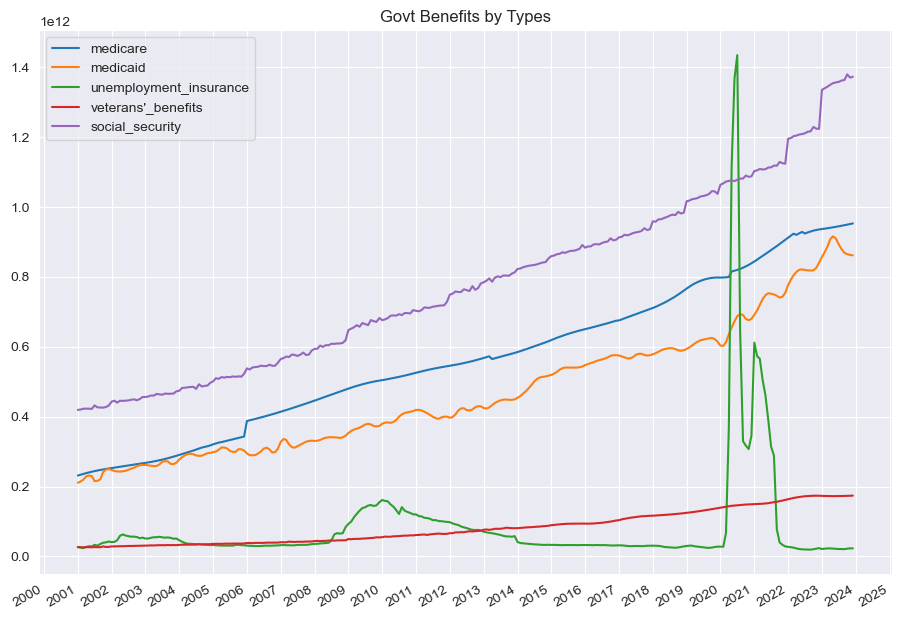

In [18]:
plot_time_series(df_subset, columns = ['medicare', 'medicaid', 
                                       'unemployment_insurance', 
                                       "veterans'_benefits", 
                                       'social_security'], title = 'Govt Benefits by Types')

- We can see clearly here the huge rise in unemployment insurance as a result of covid.

In [19]:
df_subset_2.columns

Index(['cpi_yoy', 'gdp_yoy', 'fedfunds', 'credit_yoy', 'tax_total_all_taxes',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'cc_bals_90d_due_percentage', 'disp_inc_per_capita_chained_2017',
       'cc_balance_total_billions', 'total_disposable_personal_income',
       'tax_total_all_taxes YoY growth (%)',
       'total_gov_social_benefits YoY growth (%)',
       'social_security YoY growth (%)', 'medicare YoY growth (%)',
       'medicaid YoY growth (%)', 'unemployment_insurance YoY growth (%)',
       'veterans'_benefits YoY growth (%)'],
      dtype='object')

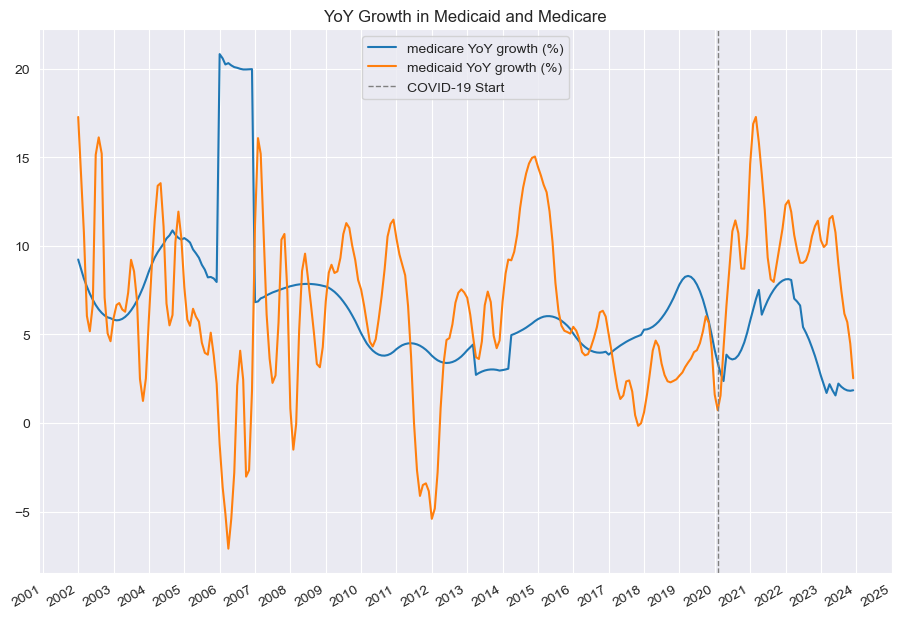

In [20]:
plot_time_series(df_subset_2, columns = [
    'medicare YoY growth (%)',
       'medicaid YoY growth (%)'], title = 'YoY Growth in Medicaid and Medicare', covid_start=True);

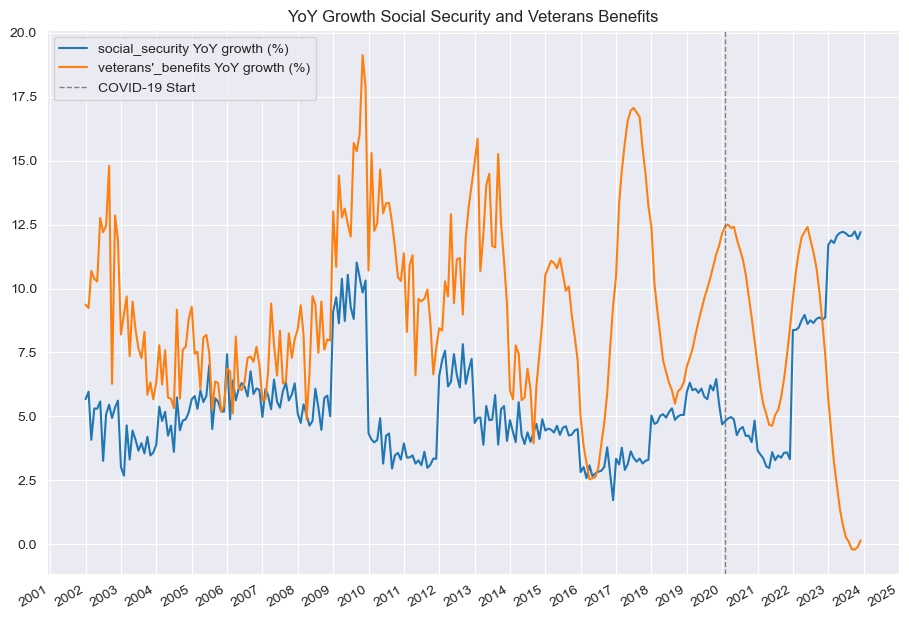

In [21]:
plot_time_series(df_subset_2, columns = [
       'social_security YoY growth (%)',
       "veterans'_benefits YoY growth (%)"], title = 'YoY Growth Social Security and Veterans Benefits', covid_start=True);

## Tax and Benefits

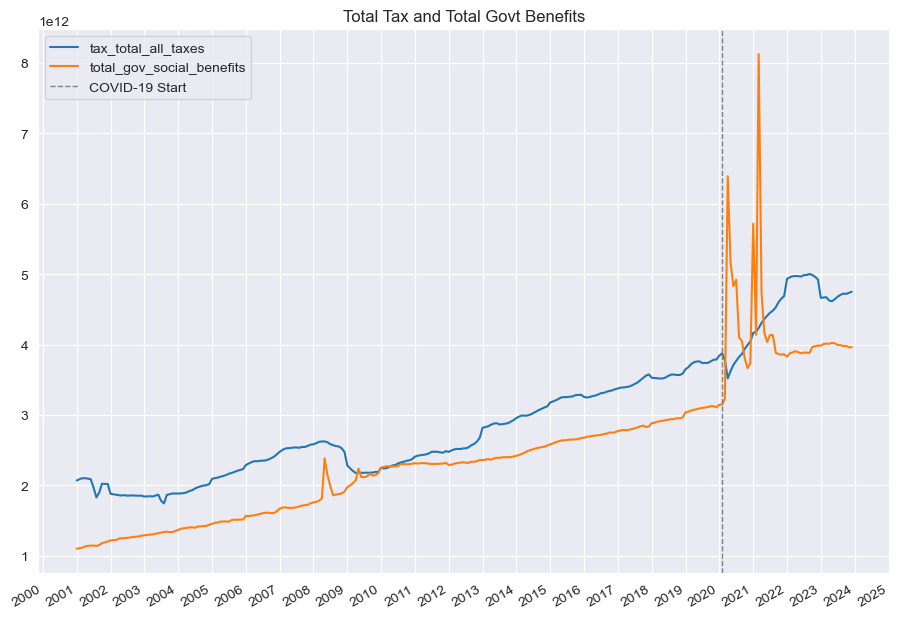

In [22]:
plot_time_series(df, columns = ['tax_total_all_taxes', 
                                'total_gov_social_benefits'], title = 'Total Tax and Total Govt Benefits', covid_start=True);

In [23]:
df_subset_2.columns

Index(['cpi_yoy', 'gdp_yoy', 'fedfunds', 'credit_yoy', 'tax_total_all_taxes',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'cc_bals_90d_due_percentage', 'disp_inc_per_capita_chained_2017',
       'cc_balance_total_billions', 'total_disposable_personal_income',
       'tax_total_all_taxes YoY growth (%)',
       'total_gov_social_benefits YoY growth (%)',
       'social_security YoY growth (%)', 'medicare YoY growth (%)',
       'medicaid YoY growth (%)', 'unemployment_insurance YoY growth (%)',
       'veterans'_benefits YoY growth (%)'],
      dtype='object')

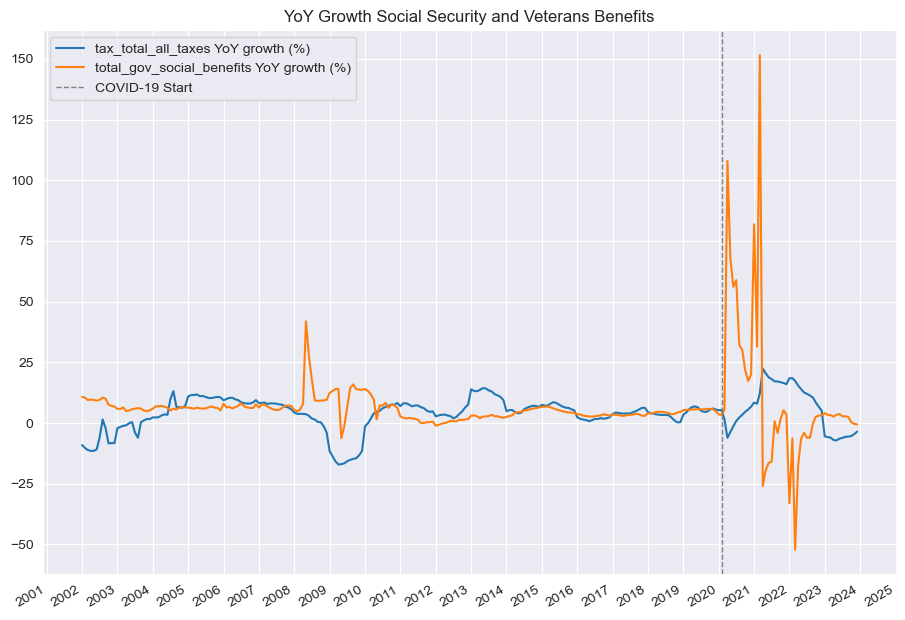

In [24]:
plot_time_series(df_subset_2, columns = [
       'tax_total_all_taxes YoY growth (%)',
       'total_gov_social_benefits YoY growth (%)'], title = 'YoY Growth Social Security and Veterans Benefits', covid_start=True);

- Fall in taxes and rise in benefits 2020 due to covid. 
- Huge rise in benefit growth at height of 2008 finanical crash.
- Benefit growth and tax growth go negative together in the wake of credit crunch. 
- Sharp decline and negative benefits growth yoy explainable by the yoy being compared the previous abnormally high benefit levels. 
- Otherwise both benefits and tax growth have been steady at around 5%. 

In [25]:
df_subset_2.describe()

,cpi_yoy,gdp_yoy,fedfunds,credit_yoy,tax_total_all_taxes,total_gov_social_benefits,social_security,medicare,medicaid,unemployment_insurance,...,disp_inc_per_capita_chained_2017,cc_balance_total_billions,total_disposable_personal_income,tax_total_all_taxes YoY growth (%),total_gov_social_benefits YoY growth (%),social_security YoY growth (%),medicare YoY growth (%),medicaid YoY growth (%),unemployment_insurance YoY growth (%),veterans'_benefits YoY growth (%)
count,276.000000,276.000000,276.000000,276.000000,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,...,276.000000,133.000000,2.760000e+02,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,2.528411,4.399489,1.591775,5.008511,2.950428e+12,2.458130e+12,7.818118e+11,5.671920e+11,4.689099e+11,8.380492e+10,...,42484.927536,656.183459,1.280278e+13,4.148484,6.687723,5.442177,6.433991,6.464292,104.802018,8.943152
std,1.834622,2.891879,1.750026,3.084354,8.984741e+11,1.008843e+12,2.573222e+11,2.102521e+11,1.818466e+11,1.597169e+11,...,4483.042985,75.525776,3.544269e+12,7.231371,15.383928,2.233312,3.643822,4.643567,585.791564,3.575475
min,-2.097161,-6.881681,0.050000,-4.125881,1.743536e+12,1.100584e+12,4.192080e+11,2.314920e+11,2.108160e+11,1.927700e+10,...,35843.000000,551.970000,7.651692e+12,-17.078628,-52.155141,1.725005,1.554249,-7.093040,-95.569146,-0.207351
25%,1.513777,3.369684,0.130000,4.423791,2.226716e+12,1.610008e+12,5.459690e+11,4.061582e+11,3.106480e+11,3.056850e+10,...,39571.750000,589.616667,1.003446e+13,1.663998,2.955985,3.953915,4.127414,3.818073,-22.594589,6.365477
50%,2.160308,4.251893,1.010000,5.516718,2.605036e+12,2.325272e+12,7.608470e+11,5.542080e+11,4.198940e+11,3.386550e+10,...,40941.500000,649.973333,1.226710e+13,4.996307,5.277782,4.941826,5.843651,6.204137,-4.804289,8.703527
75%,3.258220,5.745537,2.392500,6.655239,3.527758e+12,2.904630e+12,9.646590e+11,7.187922e+11,5.862602e+11,6.796425e+10,...,45643.750000,702.596667,1.521990e+13,8.083154,6.778985,6.044103,7.696722,9.710555,7.723858,11.350489
max,9.059758,16.969792,5.980000,12.895804,5.001717e+12,8.124572e+12,1.379646e+12,9.531250e+11,9.162080e+11,1.434899e+12,...,61509.000000,864.340000,2.185808e+13,22.395780,151.541123,12.233408,20.817174,17.270870,5486.742719,19.123906


## Tax and Benefits in relation to Disposible Income and Savings

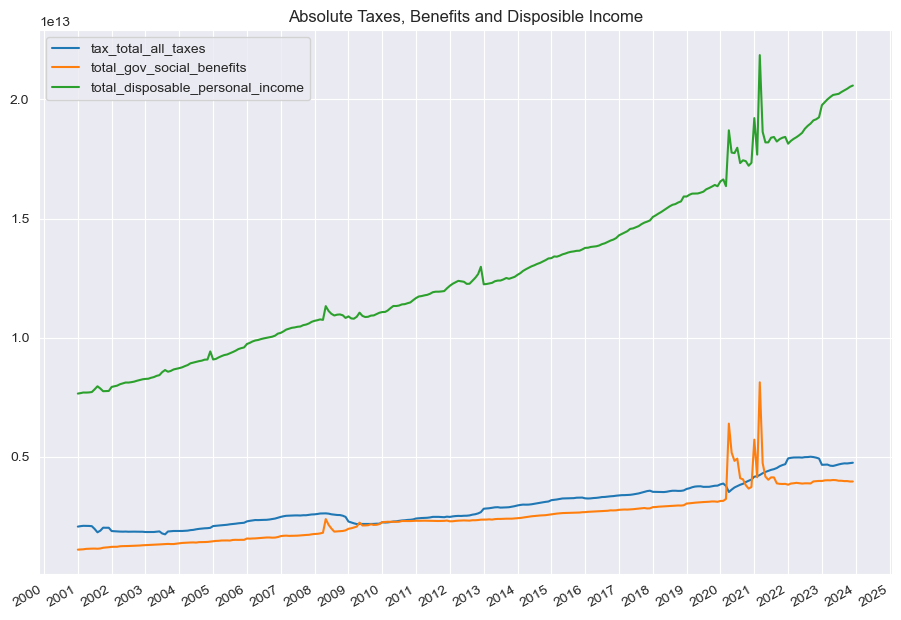

In [26]:
plot_time_series(df, columns = ['tax_total_all_taxes', 
                                       'total_gov_social_benefits', 
                                       'total_disposable_personal_income'], 
                                       title = 'Absolute Taxes, Benefits and Disposible Income')

- Clearly see where government unemployment insurance is due to covid is going, straight to disposable income. 

In [27]:
df_subset.corr(numeric_only=True)['total_disposable_personal_income'].sort_values(ascending=False)

total_disposable_personal_income    1.000000
social_security                     0.989551
medicare                            0.987855
veterans'_benefits                  0.987333
medicaid                            0.985716
disp_inc_per_capita_chained_2017    0.975810
tax_total_all_taxes                 0.968755
total_gov_social_benefits           0.944089
cc_balance_total_billions           0.773403
cpi_yoy                             0.302309
unemployment_insurance              0.260964
gdp_yoy                             0.247214
credit_yoy                         -0.090035
fedfunds                           -0.104380
cc_bals_90d_due_percentage         -0.275755
Name: total_disposable_personal_income, dtype: float64

- Absolute disposible income highly correlated with all forms of government benefits as well as tax revenue, as to be expected.

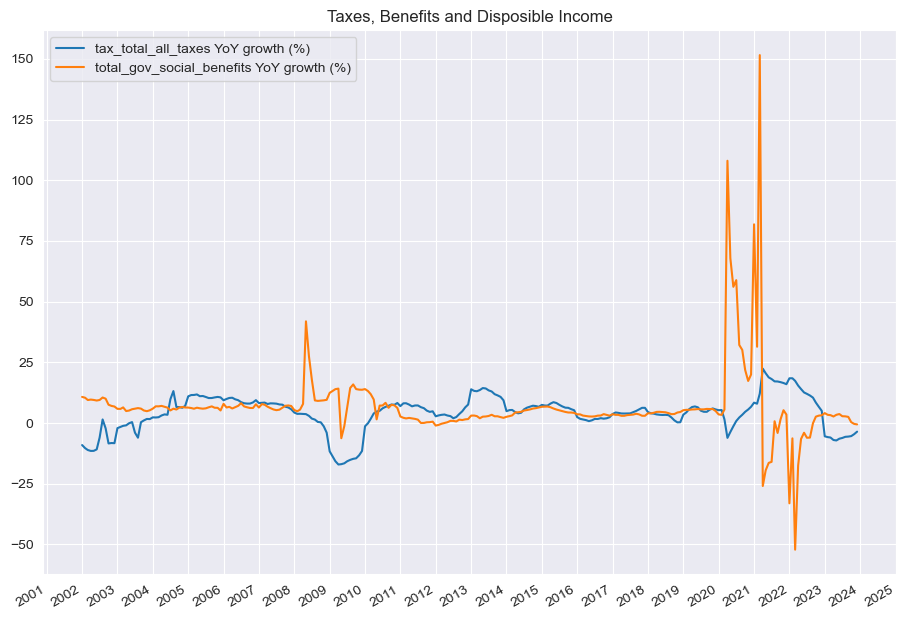

In [28]:
plot_time_series(df_subset_2, columns = [ 'tax_total_all_taxes YoY growth (%)',
                                          'total_gov_social_benefits YoY growth (%)', 
                                          ], title = 'Taxes, Benefits and Disposible Income')

## Credit and Disposible Income Relationship 

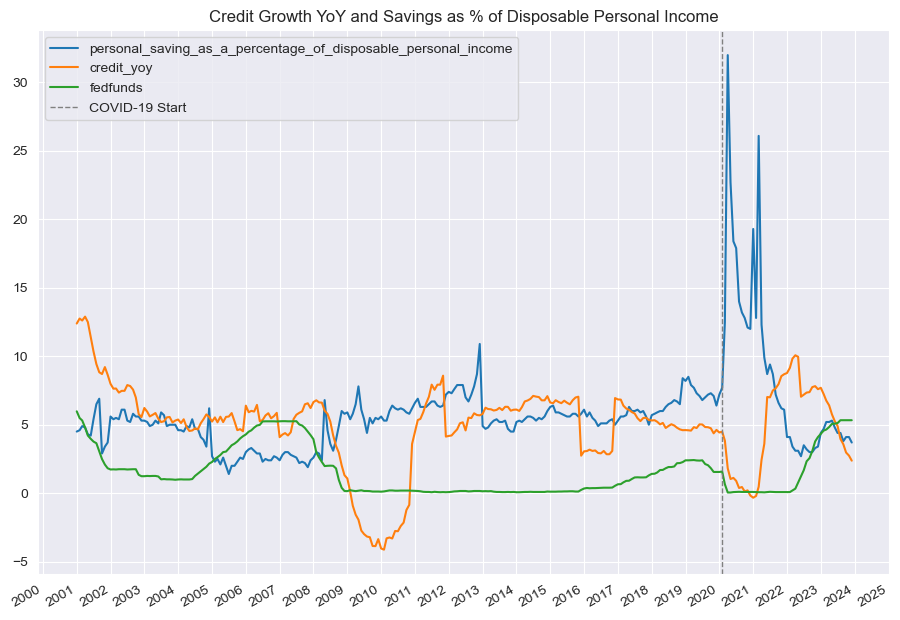

In [34]:
plot_time_series(df, columns = [ 'personal_saving_as_a_percentage_of_disposable_personal_income', 
                                'credit_yoy', 'fedfunds'
                                          ], title = 'Credit Growth YoY and Savings as % of Disposable Personal Income', 
                                          covid_start=True);

- Sharp fall in credit growth end of 2015. The Federal Reserve began raising interest rates in December 2015 which might explain this.
- Appears to be inverse relationship between savings as % of disposable income and credit yoy growth. Investigated futher below we see negative 31% correlation. 

In [30]:
correlation = df['personal_saving_as_a_percentage_of_disposable_personal_income'].corr(df['credit_yoy'])
print("Correlation coefficient between credit yoy and savings as % disposible income:", correlation)

Correlation coefficient between credit yoy and savings as % disposible income: -0.30673685413030816


## Tax and Benefits in relation to Credit

In [31]:
add_cols = df[['gdp', 
              'cc_bals_90d_due_percentage_yoy',
              'cc_bals_30d_due_percentage_yoy_3m',
                'cc_bals_30d_due_percentage_yoy_6m', 
                'cc_bals_30d_due_percentage_6m',
                'cc_bals_30d_due_percentage.1', 
                'cc_bals_90d_due_percentage.1',
                'cc_rate_all_ns'
]]
ds_subset_3 = df_subset_2.merge(add_cols, left_index = True, right_index=True, how = 'left')
ds_subset_3.shape

(276, 30)

In [32]:
ds_subset_3.corr(numeric_only=True)['credit_yoy'].sort_values(ascending=False)

credit_yoy                                  1.000000
cpi_yoy                                     0.448303
tax_total_all_taxes YoY growth (%)          0.415072
gdp_yoy                                     0.384757
cc_bals_30d_due_percentage_yoy_6m           0.320741
fedfunds                                    0.302536
cc_bals_30d_due_percentage_yoy_3m           0.271425
cc_bals_30d_due_percentage_6m               0.226804
medicare YoY growth (%)                     0.132415
cc_balance_total_billions                   0.110680
cc_bals_90d_due_percentage_yoy              0.099375
tax_total_all_taxes                         0.073092
veterans'_benefits                         -0.023709
gdp                                        -0.037528
medicaid                                   -0.046644
medicaid YoY growth (%)                    -0.055931
cc_bals_30d_due_percentage.1               -0.078137
social_security                            -0.079611
total_disposable_personal_income           -0.

- CPI, taxation, GDP, fed funds all positively correlate with credit growth yoy. 
- Benefits all negatively correlate, the more the government helps or has to help people the less credit grows. 
- Social security positively correlates with cc 90 balances due, when social security increases social security increaes. 
- Total government benefits negatively correlate with credit_yoy -35% correlation. 
- Unemplotment insurance in particular correlates negatively with credit_yoy -37% correlation, yoy -30%.

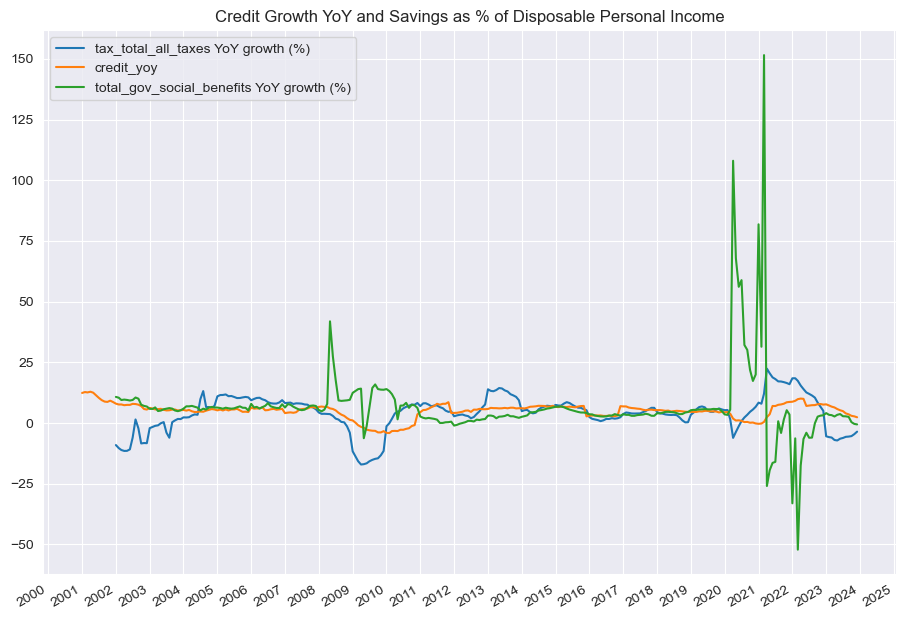

In [33]:
plot_time_series(ds_subset_3, columns = [ 'tax_total_all_taxes YoY growth (%)',
                                'credit_yoy', 
                                'total_gov_social_benefits YoY growth (%)'
                                          ], title = 'Credit Growth YoY and Savings as % of Disposable Personal Income')